Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [26]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
iris = load_iris()

In [14]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
df_class = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
df = data[['sepal length (cm)', 'sepal width (cm)']]
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df, df_class, test_size=0.25)
lda = LinearDiscriminantAnalysis()

In [23]:
lda.fit(X_train, y_train)
lda.predict(X_test)

array([2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1])

In [24]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,2
1,0,0
2,0,0
3,2,2
4,2,2
5,0,0
6,2,2
7,2,2
8,0,0
9,0,0


In [27]:
accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

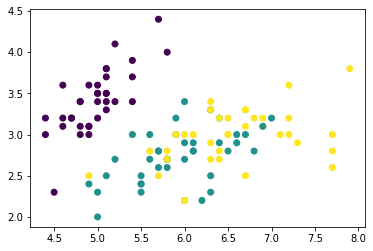

In [37]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [38]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

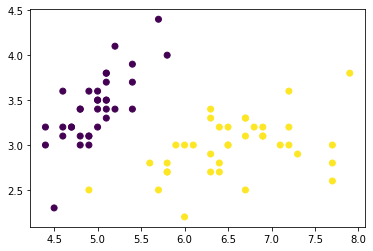

In [40]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [41]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)
lda_small.means_

array([[4.97428571, 3.41714286],
       [6.56216216, 2.97567568]])

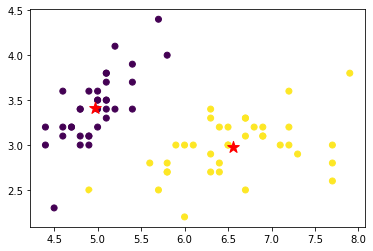

In [46]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)


# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

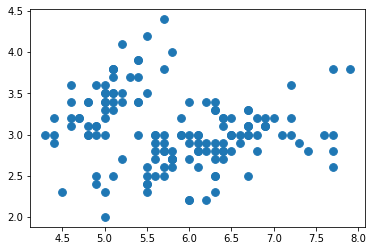

In [50]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'],cmap='autumn', s=60)

In [59]:
X_scaled = scaler.fit_transform(X_train, y_train)

In [71]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0,
       2, 2, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 2, 1,
       2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2,
       1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1,
       0, 1])

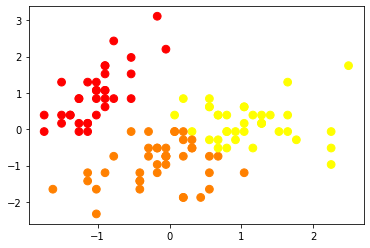

In [72]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [67]:

k_inertia = []

ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

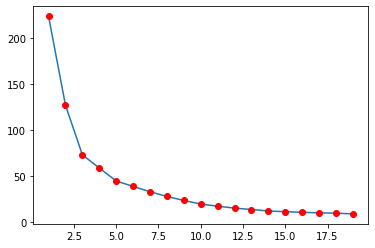

In [68]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')